In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
from datetime import datetime

In [4]:
T = 66
dt = 0.0001
S = np.zeros(int(T / dt))
E = np.zeros(int(T / dt))
I = np.zeros(int(T / dt))
P = np.zeros(int(T / dt))
A = np.zeros(int(T / dt))
H = np.zeros(int(T / dt))
R = np.zeros(int(T / dt))
F = np.zeros(int(T / dt))

In [5]:
beta, l, beta1, k, p1, p2, gama_a, gama_i, gama_r, sigma_i, sigma_p, sigma_h = 2.55, 1.56, 7.65, 0.25, 0.58, 0.001, 0.94, 0.27, 0.5, 3.5, 1, 0.3

$$
\left\{\begin{array}{l}
\frac{d S}{d t}=-\beta \frac{I}{N} S-l \beta \frac{H}{N} S-\beta^{\prime} \frac{P}{N} S, \\
\frac{d E}{d t}=\beta \frac{I}{N} S+l \beta \frac{H}{N} S+\beta^{\prime} \frac{P}{N} S-\kappa E, \\
\frac{d I}{d t}=\kappa \rho_1 E-\left(\gamma_a+\gamma_i\right) I-\delta_i I, \\
\frac{d P}{d t}=\kappa \rho_2 E-\left(\gamma_a+\gamma_i\right) P-\delta_p P, \\
\frac{d A}{d t}=\kappa\left(1-\rho_1-\rho_2\right) E, \\
\frac{d H}{d t}=\gamma_a(I+P)-\gamma_r H-\delta_h H, \\
\frac{d R}{d t}=\gamma_i(I+P)+\gamma_r H, \\
\frac{d F}{d t}=\delta_i I+\delta_p P+\delta_h H,
\end{array}\right.
$$

In [6]:
N = int(11000000 / 250)
S[0] = N - 6
I[0] = 1
P[0] = 5
for t in range(1, int(T / dt)):
    S[t] = (-beta * S[t - 1] * I[t - 1] - l * beta * H[t - 1] * S[t - 1] - beta1 * P[t - 1] * S[t - 1] ) / N
    E[t] = -S[t] - k * E[t - 1]
    I[t] = k * p1 * E[t - 1] - (gama_a + gama_i) * I[t - 1] - sigma_i * I[t - 1]
    P[t] = k * p2 * E[t - 1] - (gama_a + gama_i) * P[t - 1] - sigma_p * P[t - 1]
    A[t] = k * (1 - p1 - p2) * E[t - 1]
    H[t] = gama_a * (I[t - 1] + P[t - 1]) - gama_r * H[t - 1] - sigma_h * H[t - 1]
    R[t] = gama_i * (I[t - 1] + P[t - 1]) + gama_r * H[t - 1]
    F[t] = sigma_i * I[t - 1] + sigma_p * P[t - 1] + sigma_h * H[t - 1]
    
    
    S[t] = S[t - 1] + S[t] * dt;
    E[t] = E[t - 1] + E[t] * dt;
    I[t] = I[t - 1] + I[t] * dt;
    P[t] = P[t - 1] + P[t] * dt;
    A[t] = A[t - 1] + A[t] * dt;
    H[t] = H[t - 1] + H[t] * dt;
    R[t] = R[t - 1] + R[t] * dt;
    F[t] = F[t - 1] + F[t] * dt;
    
    
    
    for chump in (S, E, I, P, A, H, R, F):
        chump[t] = chump[t - 1] + chump[t] * dt

In [7]:
r = I + P + H
for i in range(66):
    print(int(r[int(i / dt)]), end=" ")
    if i % 10 == 0:
        print("")

6 
16 44 120 327 889 2417 6569 17855 48526 131898 
358593 975529 2658389 7276694 20137239 57003013 166381403 492755950 1452979550 4258124660 
12412997506 36019385681 104098241533 299779014574 860557016517 2463326737865 7033159262779 20034098650589 56946994662392 161559487601583 
457534676132874 1293619212786259 3652025716858567 10295660350240636 28987487347407472 81515742671560096 228971643526118848 642484439252757888 1800995844399058432 5043800575032549376 
14113081390809223168 39457190664713240576 110227686201057116160 307704382573358350336 858364889493130051584 2392880485647160180736 6666459437715977928704 18561282000187885092864 51650148065968868294656 143647332860560593125376 
399297596275258808074240 1109376559410668608946176 3080731234186270903107584 8551256956977089295155200 23725515409434492020981760 65798901388856641032552448 182408969153229006160527360 505481355928270203592376320 1400238305113665279251972096 3877418835843133726573723648 
10733297809727908504779358208 2970152

In [8]:
LC = [6, 12, 19, 25, 31, 38, 44, 60, 80, 131, 131, 259, 467, 688, 776, 1776, 1460, 1739, 1984, 2101, 2590, 2827, 3233, 3892, 3697, 3151, 3387, 2653, 2984, 2473, 2022, 1820, 1998, 1506, 1278, 2051, 1772, 1891, 399, 894, 397, 650, 415, 518, 412, 439, 441, 435, 579, 206, 130, 120, 143, 146, 102, 46, 45, 20, 31, 26, 11 , 18, 27, 29, 39, 39]

In [9]:
def plotting_2(x, y):
    fig, ax = plt.subplots()
    ax.set_facecolor('#232323')
    ax.plot(x, color = 'red')
    ax.plot(y, color = 'yellow')
    ax.tick_params(labelcolor='tab:orange')
    plt.show()

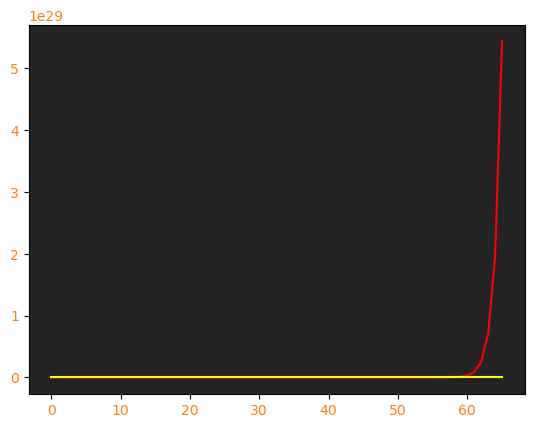

In [10]:
last = 66
plotting_2(I[:int(last / dt):int(1/dt)], LC[:last:])

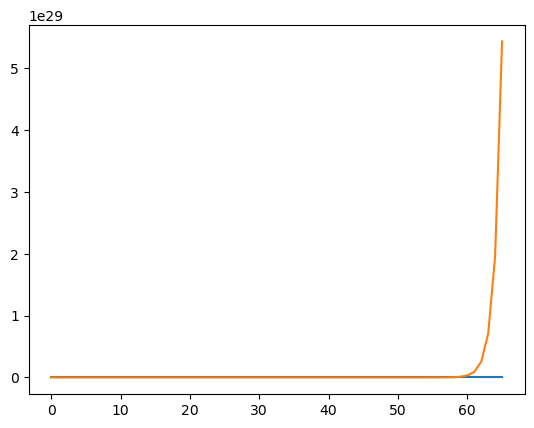

In [11]:
plt.plot(LC)
plt.plot(I[:int(last / dt):int(1/dt)])

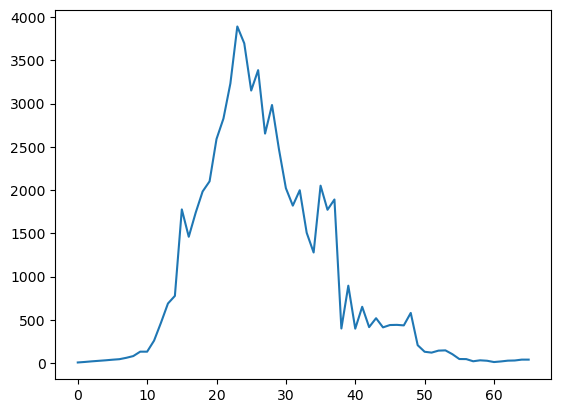

In [32]:
plt.plot(LC)